In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
 
from sklearn import metrics #метрики
from sklearn import model_selection #методы разделения и валидации
from sklearn import linear_model #линейные модели
from sklearn import tree #деревья решений
from sklearn import ensemble #ансамбли
plt.style.use('seaborn-v0_8') #стиль отрисовки seaborn
%matplotlib inline

### Содержание

- Administrative - «Административный» - Это количество страниц данного типа (административные), которые посетил пользователь.
- Administrative Duration - «Административная длительность» - Это количество времени, проведенного на страницах данной категории.
- Informational - «Информационный» - Это количество страниц данного типа (информационных), которые посетил пользователь.
- Informational Duration - «Информационная длительность» - Это количество времени, проведенного на страницах данной категории.
- Product Related - «Связанный с продуктом» - Это количество страниц данного типа (связанных с продуктом), которые посетил пользователь.
- Product Related Duration - «Связанный с продуктом длительность» - Это количество времени, проведенного на страницах данной категории.
- BounceRates - «Показатель отказов» - Процент посетителей, которые заходят на сайт через эту страницу и выходят, не выполняя никаких
- ExitRates - «Показатель выходов» - Процент просмотров страниц на веб-сайте, которые заканчиваются на данной конкретной странице.
- PageValues - «Ценность страницы» - Средняя ценность страницы, усредненная по ценности целевой страницы и/или завершению.
- SpecialDay - «Специальный день» - Это значение отображает близость даты просмотра к особым дням или праздникам (например).
- Month - «месяц»
- OperatingSystems - «операционные системы»
- Browser - «браузер»
- Region - «регион»
- TrafficType - «Тип трафика»
- VisitorType - «Тип посетителя»
- Weekend - «Выходной»
- Revenue - «Доход»

Набор данных состоит из 10 числовых и 8 категориальных атрибутов.
Атрибут «Доход» может использоваться как метка класса.

«Административный», «Административная длительность», «Информационный», «Информационная длительность», «Связанный с продуктом» и «Связанный с продуктом длительность» представляют собой количество различных типов страниц, посещенных посетителем в этом сеансе, и общее время, проведенное на каждой из этих категорий страниц. Значения этих функций выводятся из информации URL страниц, посещенных пользователем, и обновляются в режиме реального времени, когда пользователь выполняет действие, например, переходит с одной страницы на другую. Функции «Показатель отказов», «Показатель выходов» и «Ценность страницы» представляют собой метрики, измеряемые «Google Analytics» для каждой страницы на сайте электронной коммерции. Значение функции «Показатель отказов» для веб-страницы относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем покидают ее («отказ»), не вызывая никаких других запросов к серверу аналитики в течение этого сеанса. Значение функции «Показатель выходов» для конкретной веб-страницы рассчитывается как для всех просмотров страницы, процент, который был последним в сеансе. Функция «Значение страницы» представляет собой среднее значение для веб-страницы, которую пользователь посетил перед завершением транзакции электронной коммерции. Функция «Особый день» указывает на близость времени посещения сайта к определенному особому дню (например, Дню матери, Дню святого Валентина), в который сеансы с большей вероятностью завершатся транзакцией. Значение этого атрибута определяется с учетом динамики электронной коммерции, такой как продолжительность между датой заказа и датой доставки. Например, для Дня святого Валентина это значение принимает ненулевое значение между 2 и 12 февраля, ноль до и после этой даты, если она не близка к другому особому дню, и максимальное значение 1 8 февраля. Набор данных также включает операционную систему, браузер, регион, тип трафика, тип посетителя как повторный или новый посетитель, логическое значение, указывающее, является ли дата посещения выходным днем, и месяц года.

In [66]:
shoppers_data = pd.read_csv('data/online_shoppers_intention.csv')
shoppers_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [67]:
print(shoppers_data.shape)

## (12330, 18)

(12330, 18)


> **Важное замечание.** Мы не будем стремиться достичь наивысшего качества предсказания совершения покупки. Наша цель — отработать навыки работы с несбалансированными данными и применение методов валидации для оценки качества моделей.

В нашей таблице содержится информация о более чем 12 тысячах сессий на сайте интернет-магазина. Каждая сессия описывается 18 признаками.

Заранее удостоверимся в отсутствии пропусков:

In [68]:
shoppers_data.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Ни в одном из столбцов пропусков нет.

Теперь закодируем категориальные признаки с помощью простого горячего кодирования, используя уже знакомую нам функцию get_dummies():

In [69]:
dummy_data = pd.get_dummies(shoppers_data, dtype=float)
dummy_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Теперь, когда необходимые преобразования выполнены, мы можем говорить о построении модели.

Итак, нам необходимо предсказать целевую переменную **Revenue** — признак покупки. Целевой признак является бинарным категориальным, то есть мы решаем задачу бинарной классификации. В первую очередь посмотрим на соотношение классов в данных:

Sessions without purchase : 84.53%
Sessions with purchase: 15.47%


C:\Users\User\AppData\Local\Temp\ipykernel_13772\3825417070.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
C:\Users\User\AppData\Local\Temp\ipykernel_13772\3825417070.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Sessions without purchase : {:.2f}%'.format(class_percent[0]))
C:\Users\User\AppData\Local\Temp\ipykernel_13772\3825417070.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Sessions w

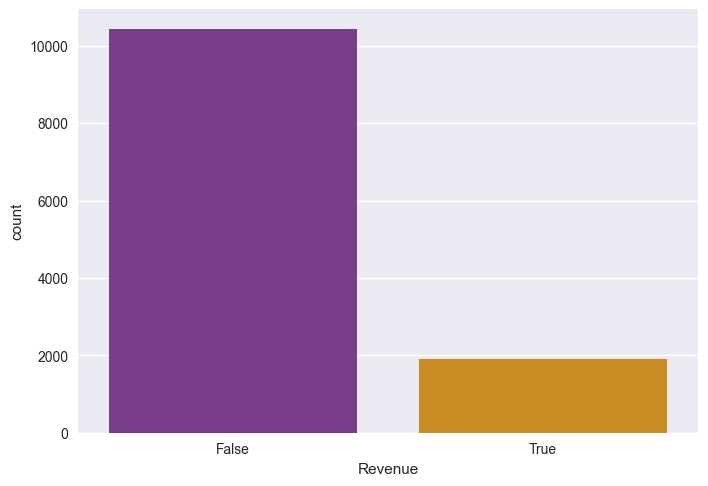

In [70]:
sns.countplot(x='Revenue', data=dummy_data, palette='CMRmap')
class_percent = dummy_data['Revenue'].value_counts(normalize=True) * 100
print('Sessions without purchase : {:.2f}%'.format(class_percent[0]))
print('Sessions with purchase: {:.2f}%'.format(class_percent[1]))

### Задание 6.1

Сбалансирована ли, по-вашему, данная выборка?

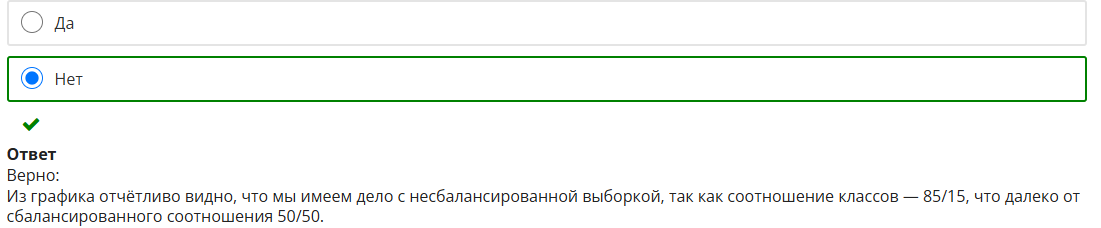

Из 12 330 сессий покупкой товара завершаются лишь 15.47 %. Мы знаем, что такое соотношение классов заставляет нас смотреть на метрики для каждого из классов отдельно.

Условимся, что лучшей будет считаться та модель, у которой значение метрики ***F1*** для пользователей, совершивших покупку, будет наибольшим.

По традиции разделим набор данных на матрицу наблюдений ***X*** и вектор ответов ***y***:

In [71]:
X, y = dummy_data.drop('Revenue', axis=1), dummy_data['Revenue']

Давайте заранее определимся, как мы будем производить контроль качества наших моделей:

- Разделим выборку на тренировочную и тестовую.
- Будем проводить кросс-валидацию на тренировочной выборке (то есть будем делить её на тренировочные и валидационные фолды и считать среднее значение метрики по фолдам).

Итого мы будем использовать три показателя:

- значение метрики на тренировочных и валидационных фолдах кросс-валидации (по ним мы будем отслеживать переобучение модели и подбирать внешние параметры);
- значение метрики на отложенной тестовой выборке (оно будет нашим контрольным показателем).
Другими словами, мы будем сочетать hold-оut- и k-fold-подходы к валидации

### Задание 6.2

Для начала позаботимся о создании отложенной тестовой выборки.

Разделите выборку на тренировочную и тестовую в соотношении 80/20. Используйте разбиение, стратифицированное по целевому признаку. В качестве значения параметра random_state возьмите число 42.

Чему равно количество сессий на сайте в тренировочной и тестовой выборках?


In [72]:
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [73]:
print('Train:\n', y_train.value_counts(normalize=True), sep='')
print('Valid:\n', y_valid.value_counts(normalize=True), sep='')

Train:
Revenue
False    0.845296
True     0.154704
Name: proportion, dtype: float64
Valid:
Revenue
False    0.845093
True     0.154907
Name: proportion, dtype: float64


***Количество сессий в тренировочной выборке:***

In [74]:
X_train.shape

(9864, 28)

***Количество сессий в тестовой выборке:***

In [75]:
X_test.shape

(2466, 28)

### Задание 6.3

Коллеги посоветовали нам использовать случайный лес (Random Forest) для решения данной задачи. Давайте последуем их совету.

Создайте модель случайного леса. В качестве значения параметра random_state возьмите число 42. Остальные параметры оставьте по умолчанию.

Оцените качество такой модели с помощью кросс-валидации по пяти фолдам. Так как классы несбалансированы, используйте кросс-валидатор StratifiedKFold (перемешивать выборку не нужно).

Для проведения кросс-валидации используйте функцию cross_validate(). Набор данных (параметры X, y) — тренировочная выборка (X_train, y_train). Метрика — ***F1***-*score*.

Чему равно среднее значение метрики ***F1*** на тренировочных и валидационных фолдах? Ответ **округлите до двух знаков после точки-разделителя.**

In [76]:
model = ensemble.RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

skf = model_selection.StratifiedKFold(n_splits=5)

cv_metrics = model_selection.cross_validate(model, X_train, y_train, cv=skf, scoring='f1', return_train_score=True) 

print('Train k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['train_score']))) 
print('Valid k-fold mean f1: {:.2f}'.format(np.mean(cv_metrics['test_score']))) 

Train k-fold mean f1: 1.00
Valid k-fold mean f1: 0.65


### Задание 6.4

Является ли, по-вашему, построенная в предыдущем задании модель случайного леса переобученной?

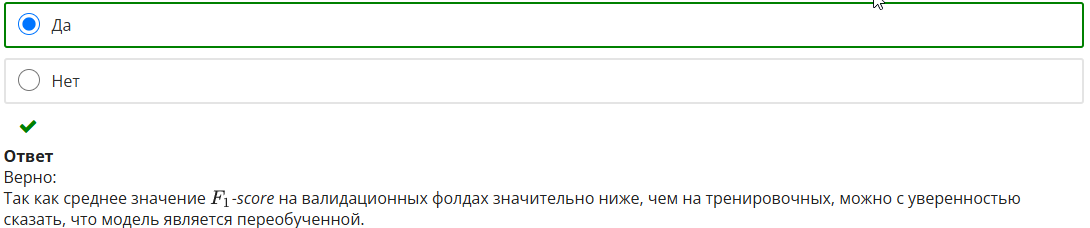

### Задание 6.5

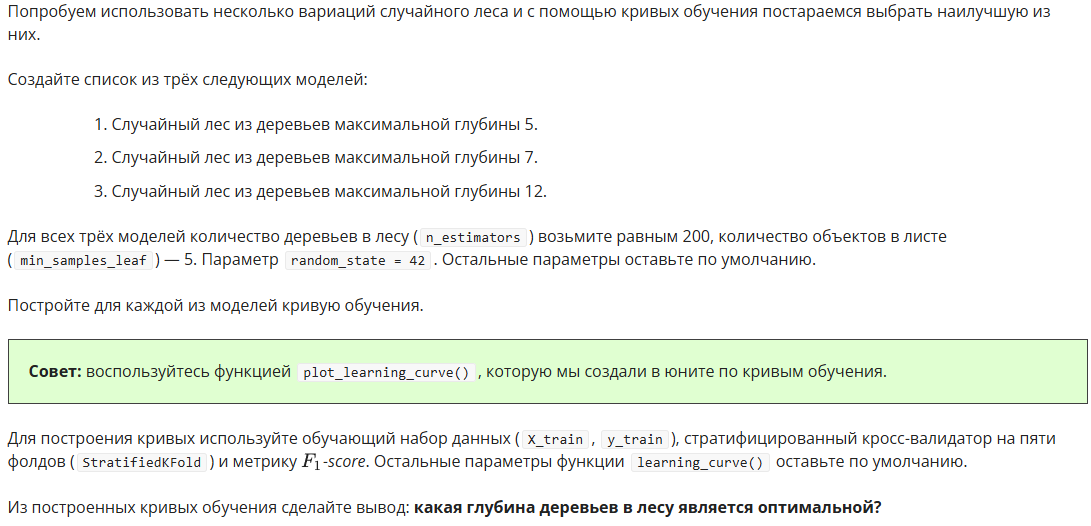

In [77]:
def plot_learning_curve(model, X, y, cv, scoring="f1", ax=None, title=""):
    # Вычисляем координаты для построения кривой обучения
    train_sizes, train_scores, valid_scores = model_selection.learning_curve(
        estimator=model,  # модель
        X=X,  # матрица наблюдений X
        y=y,  # вектор ответов y
        cv=cv,  # кросс-валидатор
        scoring=scoring,  # метрика
    )
    # Вычисляем среднее значение по фолдам для каждого набора данных
    train_scores_mean = np.mean(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    # Если координатной плоскости не было передано, создаём новую
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 4))  # фигура + координатная плоскость
    # Строим кривую обучения по метрикам на тренировочных фолдах
    ax.plot(train_sizes, train_scores_mean, label="Train")
    # Строим кривую обучения по метрикам на валидационных фолдах
    ax.plot(train_sizes, valid_scores_mean, label="Valid")
    # Даём название графику и подписи осям
    ax.set_title("Learning curve: {}".format(title))
    ax.set_xlabel("Train data size")
    ax.set_ylabel("Score")
    # Устанавливаем отметки по оси абсцисс
    ax.xaxis.set_ticks(train_sizes)
    # Устанавливаем диапазон оси ординат
    ax.set_ylim(0, 1)
    # Отображаем легенду
    ax.legend()

In [78]:
#Создаём список из моделей
models = [
ensemble.RandomForestClassifier(
    n_estimators=200, #число деревьев
    max_depth=5, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
),
ensemble.RandomForestClassifier(
    n_estimators=200, #число деревьев
    max_depth=7, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
),
ensemble.RandomForestClassifier(
    n_estimators=200, #число деревьев
    max_depth=12, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)
]

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_scorer.py", line 371, in _score
    y_pred = method_caller(
     

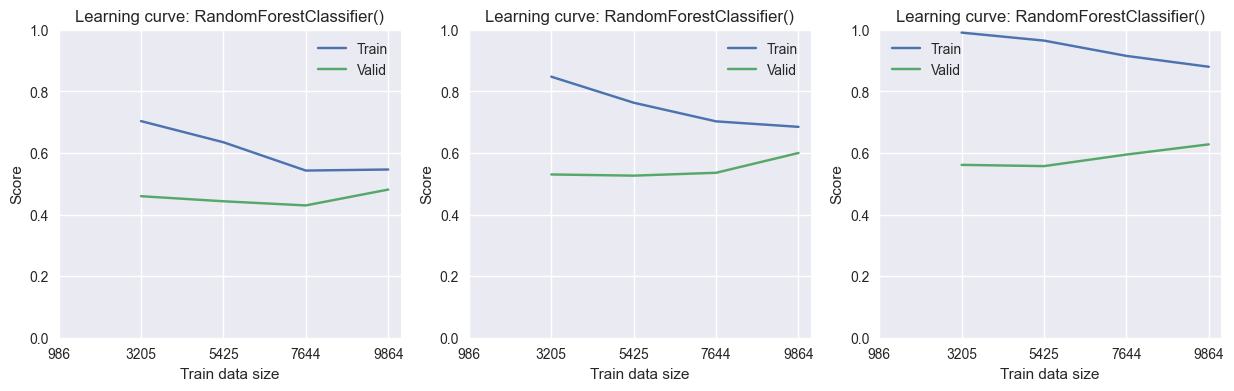

In [79]:
#Создаем объект кросс-валидатора k-fold со стратификацией
skf = model_selection.StratifiedKFold(n_splits=5)
#Визуализируем кривые обучения
fig, axes = plt.subplots(1, 3, figsize=(15, 4)) #фигура + 3 координатных плоскости
#Создаем цикл по списку моделей и индексам этого списка
for i, model in enumerate(models): #i-текущий индекс, model - текущая модель
    plot_learning_curve(
        model, X, y, 
        skf, 
        ax=axes[i], 
        title=model.__class__.__name__ + '()'
)

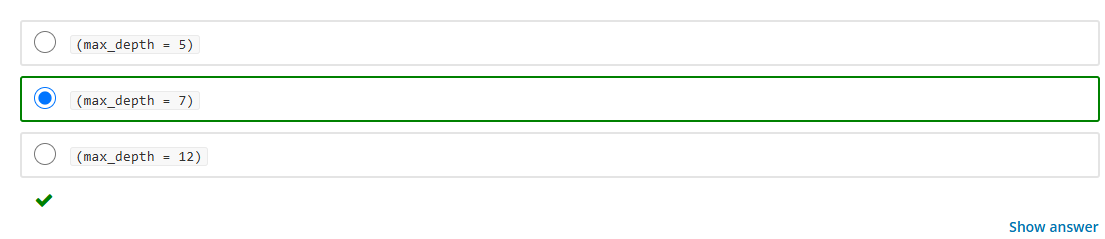

### Задание 6.6

Обучите случайный лес с выбранной в предыдущем задании оптимальной глубиной на тренировочной выборке. Сделайте предсказание меток классов и выведите отчёт о метриках классификации.

Ответьте на следующие вопросы:

***Параметр min_samples_leaf=5 в RandomForestClassifier задаёт минимальное количество образцов (наблюдений, примеров) в листе каждого дерева.***

Что это значит?
Когда дерево строится, оно разбивает данные на узлы. Узел превращается в лист (конечную ветку), если в нем осталось не менее 5 образцов.

Как это влияет на модель?
Большее значение (min_samples_leaf > 1) — модель менее сложная, лучше обобщает данные (меньше переобучается).
Меньшее значение (min_samples_leaf = 1) — модель более гибкая, но может переобучаться.

Значение 5 здесь выбрано как компромисс: оно не даёт деревьям слишком глубоко разветвляться, уменьшая переобучение, но при этом позволяет находить полезные закономерности.

In [80]:
model = ensemble.RandomForestClassifier(
    n_estimators=200, 
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)
y_valid_predict = model.predict(X_valid)
print(metrics.classification_report(y_valid, y_valid_predict))

              precision    recall  f1-score   support

       False       0.91      0.98      0.94      2084
        True       0.79      0.49      0.60       382

    accuracy                           0.90      2466
   macro avg       0.85      0.73      0.77      2466
weighted avg       0.89      0.90      0.89      2466



### Задание 6.7

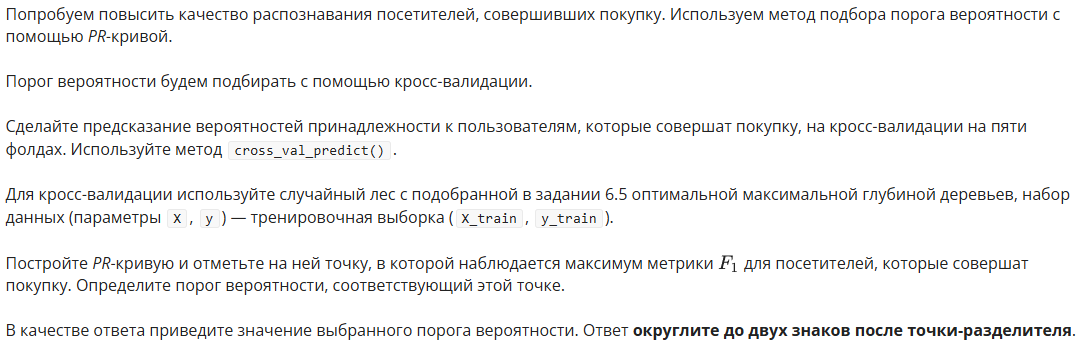


In [81]:
model = ensemble.RandomForestClassifier(
    n_estimators=200, 
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

skf = model_selection.StratifiedKFold(n_splits=5)

#Делаем предсказание вероятностей на кросс-валидации
y_cv_proba_pred = model_selection.cross_val_predict(model, X_train, y_train, cv=skf, method='predict_proba')
y_cv_proba_pred

array([[0.67751554, 0.32248446],
       [0.96913055, 0.03086945],
       [0.97981615, 0.02018385],
       ...,
       [0.98993487, 0.01006513],
       [0.47892495, 0.52107505],
       [0.30235619, 0.69764381]])

In [82]:
#Выделяем столбец с вероятностями для класса 1 
y_cv_proba_pred = y_cv_proba_pred[:, 1]
y_cv_proba_pred

array([0.32248446, 0.03086945, 0.02018385, ..., 0.01006513, 0.52107505,
       0.69764381])

In [83]:
#Вычисляем координаты PR-кривой
precision, recall, thresholds = metrics.precision_recall_curve(y_train, y_cv_proba_pred)

print('Thresholds:', thresholds[:5])
print('Precision scores:', precision[:5])
print('Recall scores:',recall[:5])

Thresholds: [0.0016146  0.00183509 0.00191163 0.00191452 0.00194508]
Precision scores: [0.15470397 0.15471966 0.15473535 0.15475104 0.15476673]
Recall scores: [1. 1. 1. 1. 1.]


Best threshold = 0.36, F1-Score = 0.69


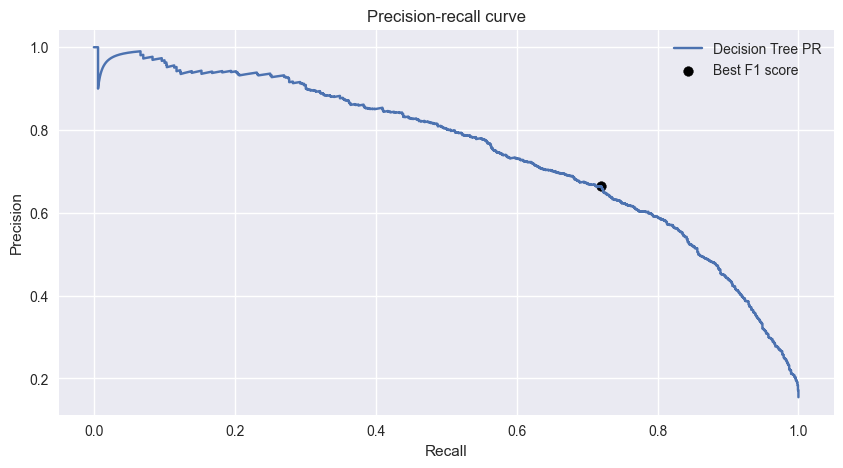

In [84]:
#Вычисляем F1-меру при различных threshold
f1_scores = (2 * precision * recall) / (precision + recall)
#Определяем индекс максимума
idx = np.argmax(f1_scores)
print('Best threshold = {:.2f}, F1-Score = {:.2f}'.format(thresholds[idx], f1_scores[idx]))

#Строим PR-кривую
fig, ax = plt.subplots(figsize=(10, 5)) #фигура + координатная плоскость
#Строим линейный график зависимости precision от recall
ax.plot(recall, precision, label='Decision Tree PR')
#Отмечаем точку максимума F1
ax.scatter(recall[idx], precision[idx], marker='o', color='black', label='Best F1 score')
#Даем графику название и подписи осям
ax.set_title('Precision-recall curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
#Отображаем легенду
ax.legend();

### Задание 6.8

Сделайте предсказание классов объекта с определённым в предыдущем задании порогом вероятности. Выведите отчёт о метриках классификации.

Ответьте на следующие вопросы:

In [85]:
model = ensemble.RandomForestClassifier(
    n_estimators=200, 
    max_depth=7,
    min_samples_leaf=5,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [87]:
#Задаём оптимальный порог вероятностей
threshold_opt = 0.36
#Объекты, для которых вероятность быть классом 1 > threshold_opt, относим к классу 1
#В противном случае — к классу 0
y_valid_pred_proba = model.predict_proba(X_valid)[:, 1]
y_valid_pred = (y_valid_pred_proba > threshold_opt).astype('int')
#Считаем метрики
print(metrics.classification_report(y_valid, y_valid_pred))

              precision    recall  f1-score   support

       False       0.94      0.93      0.94      2084
        True       0.66      0.69      0.67       382

    accuracy                           0.90      2466
   macro avg       0.80      0.81      0.81      2466
weighted avg       0.90      0.90      0.90      2466



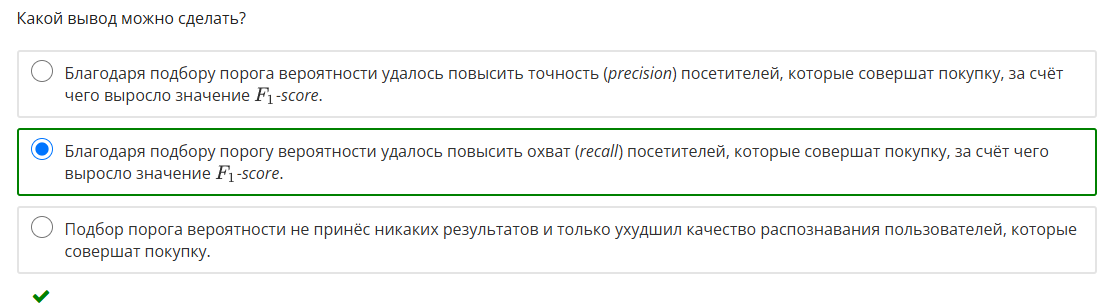